In [1]:
import numpy as np
import pandas as pd
from astropy.cosmology import LambdaCDM
import matplotlib.pyplot as plt
# import treecorr
from astropy.io import fits
# import sys
# sys.path.append('/home/fcaporaso/modified_gravity/')
# from lensing.funcs import lenscat_load

cosmology = LambdaCDM(H0=100.0, Om0=0.3089, Ode0=0.6911)


#### LCDM

In [ ]:
plt.hist(cats_LCDM.lenses.rv,density=True,histtype='step')
plt.xlabel('$R_v$')
plt.show()

In [ ]:
plt.hist(cats_LCDM.lenses.redshift, density=True, histtype='step',label='lenses')
plt.hist(cats_LCDM.sources.redshift, density=True, histtype='step',label='sources')
plt.xlabel('redshift')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(3,2,
                      figsize=(6,9))

# axL,axS = ax[:,0], ax[:,1]

for j,name in enumerate(['ra','dec','r_com']):

    ax[j,0].hist(cats_LCDM.lenses[name], histtype='step', bins=50, density=True)
    ax[j,0].hist(cats_LCDM.random_lenses[name], histtype='step', bins=50, density=True)
    
    ax[j,1].hist(cats_LCDM.sources[name], histtype='step', bins=50, density=True)
    ax[j,1].hist(cats_LCDM.random_sources[name], histtype='step', bins=50, density=True)

# ax[-1,-1].legend()
plt.show()

#### fR

In [ ]:
plt.hist(cats_fR.sources.r_com, bins=50, histtype='step', density=True)
plt.hist(cats_fR.random_sources.r_com, bins=50, histtype='step', density=True)
plt.show()

In [ ]:
plt.hist(cats_fR.lenses.rv,density=True,histtype='step')
plt.xlabel('$R_v$')
plt.show()

In [ ]:
plt.hist(cats_fR.lenses.redshift, density=True, histtype='step',label='lenses')
plt.hist(cats_fR.sources.redshift, density=True, histtype='step',label='sources')
plt.xlabel('redshift')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(3,2,
                      figsize=(6,9))

# axL,axS = ax[:,0], ax[:,1]

for j,name in enumerate(['ra','dec','r_com']):

    ax[j,0].hist(cats_fR.lenses[name], histtype='step', bins=50, density=True)
    ax[j,0].hist(cats_fR.random_lenses[name], histtype='step', bins=50, density=True)
    
    ax[j,1].hist(cats_fR.sources[name], histtype='step', bins=50, density=True)
    ax[j,1].hist(cats_fR.random_sources[name], histtype='step', bins=50, density=True)

# ax[-1,-1].legend()
plt.show()

In [ ]:
plt.hist(cats_fR.sources.r_com, bins=50, histtype='step', density=True)
plt.hist(cats_fR.random_sources.r_com, bins=50, histtype='step', density=True)
plt.show()

## Plots

In [3]:
def err_frac2(a, b, e_a, e_b):
    """
    error de D = a/b -1 
    """
    # e_a2 = np.diag(cova)
    # e_b2 = np.diag(covb)
    # np.cov(cova,covb)
    
    return e_a/np.abs(b) + e_b/np.abs(a)

In [149]:
def err(x,y,ex,ey):
    return (1.0/np.abs(y))*np.hypot(ex,(x/y)*ey)

In [52]:
zs = ['01-02',
      # '05-06'
     ]
rvs = ['10-12','12-14','14-16','16-18','18-20','20-22',
       # '22-50'
      ]
sim = ['LCDM', 'fR']

path = '/home/fcaporaso/modified_gravity/statistics/'

p = {}
for s in sim:
    p[s] = {}
    for z in zs:
        p[s][z] = {}
        for i,rv in enumerate(rvs):
            with fits.open(path+f'vgcf_test{i+1}_{s}_{rv}_z{z}_typeall.fits') as f:
                p[s][z][rv] = np.vstack([f[1].data.r,f[1].data.Xi,np.sqrt(np.diag(f[2].data.cov.reshape(22,22)))])

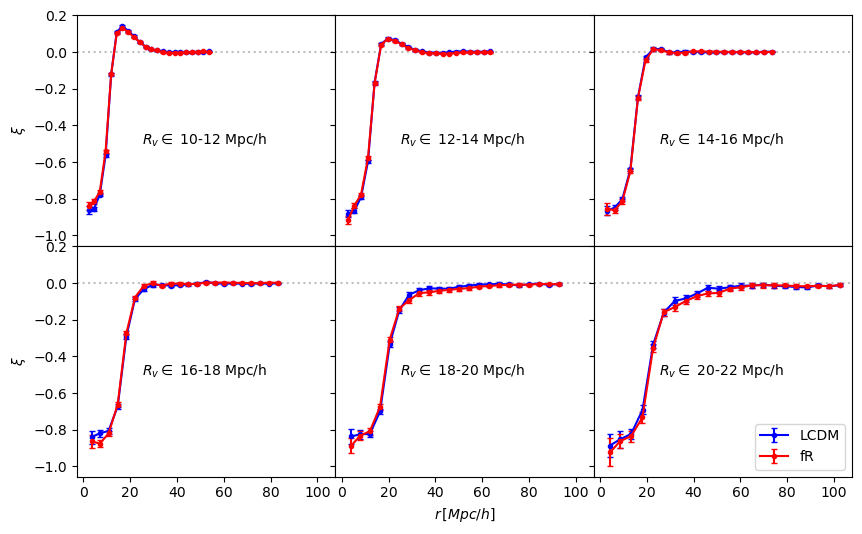

In [195]:
ny = 2+(len(zs)*len(rvs))%2
nx = (len(zs)*len(rvs))//2
fig, axes = plt.subplots(
    ny,nx,
    figsize=(10,6),
    sharex=True, sharey=True,
)

i,j = 0,0
for z in zs:
    for rv in rvs:
        for s in sim:
            axes[i,j].errorbar(
                p[s][z][rv][0], p[s][z][rv][1], p[s][z][rv][2],
                capsize=2, label=s, fmt='.-', c= ('b' if s=='LCDM' else 'r'),
            )
        axes[i,j].text(25,-0.5,f'$R_v \\in$ {rv} Mpc/h')
        axes[i,j].axhline(0,ls=':',c='gray',alpha=0.5)
        j+=1
        if j>=nx:
            j=0
            i+=1
            
axes[-1,-1].legend()
axes[-1,-2].set_xlabel('$r \, [Mpc/h]$')
axes[0,0].set_ylabel('$\\xi$')
axes[1,0].set_ylabel('$\\xi$')
plt.subplots_adjust(wspace=0.0, hspace=0.0)

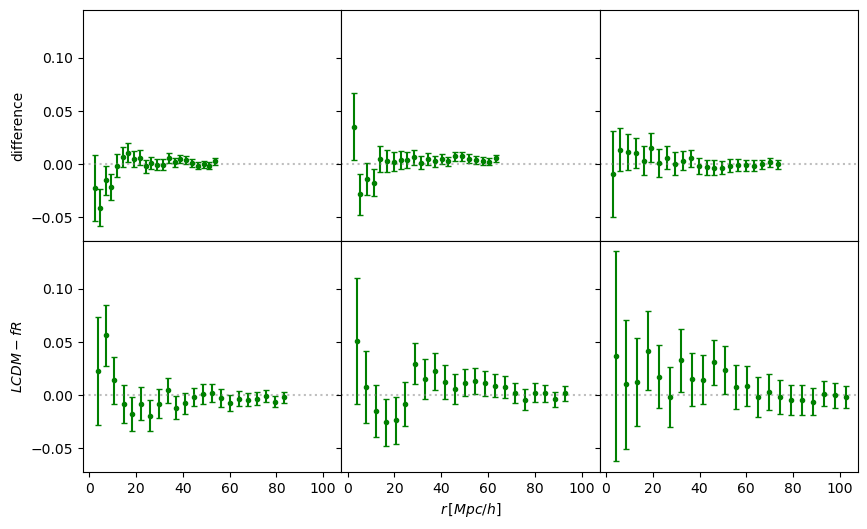

In [207]:
ny = 2+(len(zs)*len(rvs))%2
nx = (len(zs)*len(rvs))//2
fig, axes = plt.subplots(
    ny,nx,
    figsize=(10,6),
    sharex=True, sharey=True,
)

i,j = 0,0
for z in zs:
    for rv in rvs:
#         axes[i,j].errorbar(
#             p['LCDM'][z][rv][0], (p['LCDM'][z][rv][1]/p['fR'][z][rv][1])-1.0,
#             err(p['LCDM'][z][rv][1],p['fR'][z][rv][1],p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
#             capsize=2, fmt='.', c='k',
#         )
        
        axes[i,j].errorbar(
            p['LCDM'][z][rv][0], p['LCDM'][z][rv][1]-p['fR'][z][rv][1],
            np.hypot(p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
            capsize=2, fmt='.', c='g',
        )
        
        # axes[i,j].errorbar(
        #     p['LCDM'][z][rv][0], np.abs(p['LCDM'][z][rv][1]-p['fR'][z][rv][1])/np.abs(p['fR'][z][rv][1]),
        #     err(p['LCDM'][z][rv][1]+1,p['fR'][z][rv][1]+1,p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
        #     capsize=2, fmt='.', c='k',
        # )
        axes[i,j].axhline(0,ls=':',c='gray',alpha=0.5)
        # axes[i,j].set_ylim(-1.1,1.1)
        # axes[i,j].set_xlim(0.0,30.0)
        j+=1
        if j>=nx:
            j=0
            i+=1
            
# axes[-1,-1].legend()
axes[-1,-2].set_xlabel('$r \, [Mpc/h]$')
axes[0,0].set_ylabel('difference')
axes[1,0].set_ylabel('$LCDM-fR$')
plt.subplots_adjust(wspace=0.0, hspace=0.0)

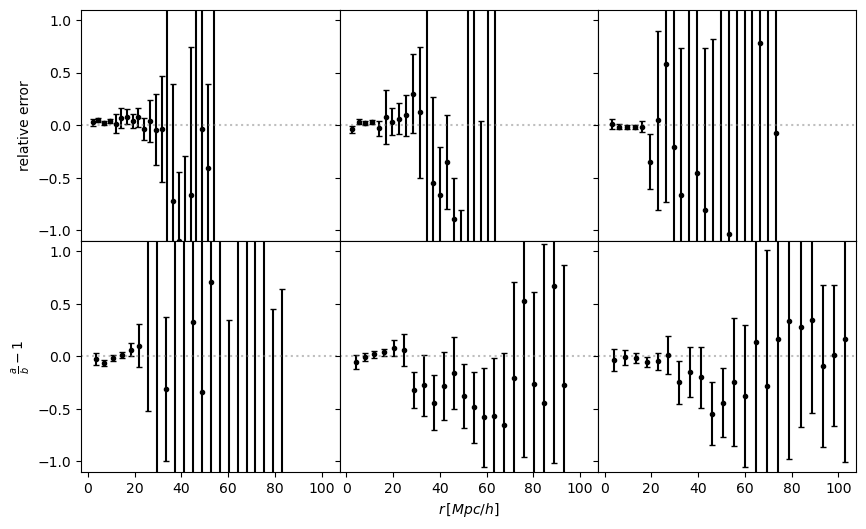

In [201]:
ny = 2+(len(zs)*len(rvs))%2
nx = (len(zs)*len(rvs))//2
fig, axes = plt.subplots(
    ny,nx,
    figsize=(10,6),
    sharex=True, sharey=True,
)

i,j = 0,0
for z in zs:
    for rv in rvs:
        axes[i,j].errorbar(
            p['LCDM'][z][rv][0], (p['LCDM'][z][rv][1]/p['fR'][z][rv][1])-1.0,
            err(p['LCDM'][z][rv][1],p['fR'][z][rv][1],p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
            capsize=2, fmt='.', c='k',
        )
        
        # axes[i,j].errorbar(
        #     p['LCDM'][z][rv][0], np.abs(p['LCDM'][z][rv][1]-p['fR'][z][rv][1])/np.abs(p['fR'][z][rv][1]),
        #     err(p['LCDM'][z][rv][1],p['fR'][z][rv][1],p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
        #     capsize=2, fmt='.', c='g',
        # )
        
        # axes[i,j].errorbar(
        #     p['LCDM'][z][rv][0], np.abs(p['LCDM'][z][rv][1]-p['fR'][z][rv][1])/np.abs(p['fR'][z][rv][1]),
        #     err(p['LCDM'][z][rv][1]+1,p['fR'][z][rv][1]+1,p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
        #     capsize=2, fmt='.', c='k',
        # )
        axes[i,j].axhline(0,ls=':',c='gray',alpha=0.5)
        axes[i,j].set_ylim(-1.1,1.1)
        # axes[i,j].set_xlim(0.0,30.0)
        j+=1
        if j>=nx:
            j=0
            i+=1
            
# axes[-1,-1].legend()
axes[-1,-2].set_xlabel('$r \, [Mpc/h]$')
axes[0,0].set_ylabel('relative error')
axes[1,0].set_ylabel('$\\frac{a}{b}-1$')
plt.subplots_adjust(wspace=0.0, hspace=0.0)

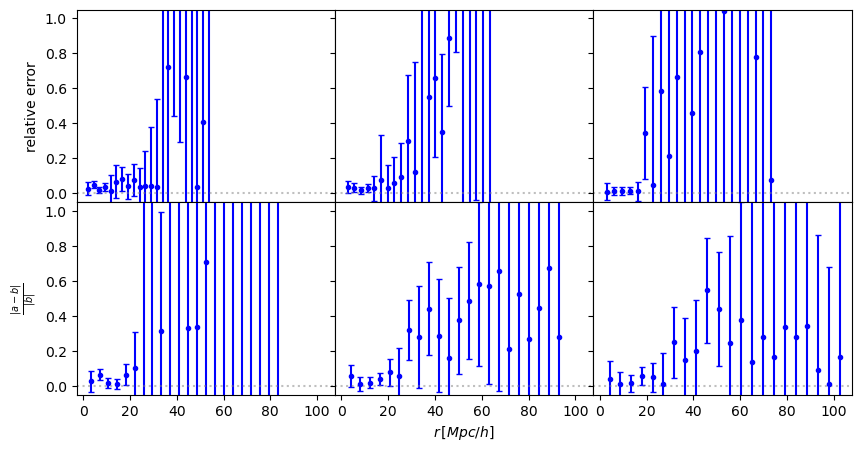

In [210]:
ny = 2+(len(zs)*len(rvs))%2
nx = (len(zs)*len(rvs))//2
fig, axes = plt.subplots(
    ny,nx,
    figsize=(10,5),
    sharex=True, sharey=True,
)

i,j = 0,0
for z in zs:
    for rv in rvs:
       
        axes[i,j].errorbar(
            p['LCDM'][z][rv][0], np.abs(p['LCDM'][z][rv][1]-p['fR'][z][rv][1])/np.abs(p['fR'][z][rv][1]),
            err(p['LCDM'][z][rv][1],p['fR'][z][rv][1],p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
            capsize=2, fmt='.', c='b',
        )
        # axes[i,j].errorbar(
        #     p['LCDM'][z][rv][0], np.abs(p['LCDM'][z][rv][1]-p['fR'][z][rv][1])/np.abs(p['fR'][z][rv][1]+1),
        #     err(p['LCDM'][z][rv][1]+1,p['fR'][z][rv][1]+1,p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
        #     capsize=2, fmt='.', c='b',
        # )
        
        axes[i,j].axhline(0,ls=':',c='gray',alpha=0.5)
        axes[i,j].set_ylim(-0.05,1.05)
        # axes[i,j].set_xlim(0.0,30.0)
        j+=1
        if j>=nx:
            j=0
            i+=1
            
# axes[-1,-1].legend()
axes[-1,-2].set_xlabel('$r \, [Mpc/h]$')
axes[0,0].set_ylabel('relative error')
axes[1,0].set_ylabel('$\\frac{|a-b|}{|b|}$')
plt.subplots_adjust(wspace=0.0, hspace=0.0)

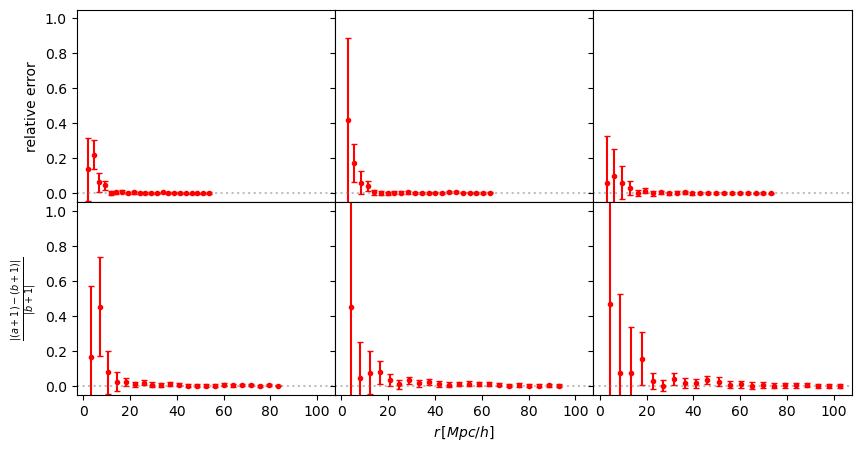

In [213]:
ny = 2+(len(zs)*len(rvs))%2
nx = (len(zs)*len(rvs))//2
fig, axes = plt.subplots(
    ny,nx,
    figsize=(10,5),
    sharex=True, sharey=True,
)

i,j = 0,0
for z in zs:
    for rv in rvs:
       
        # axes[i,j].errorbar(
        #     p['LCDM'][z][rv][0], np.abs(p['LCDM'][z][rv][1]-p['fR'][z][rv][1])/np.abs(p['fR'][z][rv][1]),
        #     err(p['LCDM'][z][rv][1],p['fR'][z][rv][1],p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
        #     capsize=2, fmt='.', c='b',
        # )
        axes[i,j].errorbar(
            p['LCDM'][z][rv][0], np.abs(p['LCDM'][z][rv][1]-p['fR'][z][rv][1])/np.abs(p['fR'][z][rv][1]+1),
            err(p['LCDM'][z][rv][1]+1,p['fR'][z][rv][1]+1,p['LCDM'][z][rv][2],p['fR'][z][rv][2]),
            capsize=2, fmt='.', c='r',
        )
        
        axes[i,j].axhline(0,ls=':',c='gray',alpha=0.5)
        axes[i,j].set_ylim(-0.05,1.05)
        # axes[i,j].set_xlim(0.0,30.0)
        j+=1
        if j>=nx:
            j=0
            i+=1
            
# axes[-1,-1].legend()
axes[-1,-2].set_xlabel('$r \, [Mpc/h]$')
axes[0,0].set_ylabel('relative error')
axes[1,0].set_ylabel('$\\frac{|(a+1)-(b+1)|}{|b+1|}$')
plt.subplots_adjust(wspace=0.0, hspace=0.0)